# The Perception Step

In [1]:
# Import some packages from matplotlib

%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

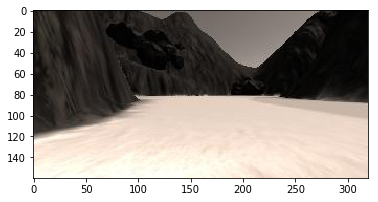

In [2]:
# Define the filename, read and plot the image

filename = 'images/sample.jpg'

image = mpimg.imread(filename)

plt.imshow(image)
plt.show()

In [3]:
# Import the "numpy" package for working with arrays
import numpy as np

In [4]:
print(image.dtype, image.shape, np.min(image), np.max(image))

# output should be uint8 (160, 320, 3) 0 255


uint8 (160, 320, 3) 0 255


So, here we can see it's an 8-bit unsigned integer array (uint8), where the size of the array is (160, 320, 3) meaning the image size is 160 pixels in the y-direction (height), 320 pixels in the x-direction (width) and it has 3 layers or "color channels".

We can also see that the minimum and maximum values are 0 and 255, respectively. This comes from the fact that with 8 bits of information for each pixel in each color channel, you have 2^8 or 256 possible values, with the minimum possible value being 0 and the maximum being 255. Not all images are scaled this way so it's always a good idea to check the range and data type of the array after reading in an image if you're not sure.

# Color Channels

The three color channels of the image are red, green and blue or "RGB" for short. The combination of intensity values across the three channels determines what color we see in the image. You can look at each of the color channels in isolation by zeroing out the others and lining them up side by side like this:

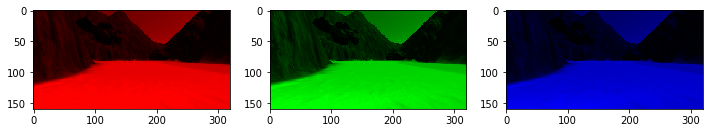

In [5]:
# Note: we use the np.copy() function rather than just saying red_channel = image
# because in Python, such a statement would set those two arrays equal to each other
# forever, meaning any changes made to one would also be made to the other!

# Note: here instead of extracting individual channels from the image
# I'll keep all 3 color channels in each case but set the ones I'm not interested 
# in to zero. 
red_channel = np.copy(image)
red_channel[:,:,[1, 2]] = 0 # Zero out the green and blue channels

green_channel = np.copy(image)
green_channel[:,:,[0, 2]] = 0 # Zero out the red and blue channels

blue_channel = np.copy(image)
blue_channel[:,:,[0, 1]] = 0 # Zero out the red and green channels

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting

plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel

plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel

plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel

plt.show()

# Color Thresholding

In [6]:
# function that will return a mask with all pixels above a certian color threshold

def color_thresh(img, rgb_thresh=(0, 0, 0)):

    color_select = np.zeros_like(img[:,:,0])

    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])

    color_select[above_thresh] = 1

    return color_select

In [7]:
# Define color selection criteria

red_threshold = 160
green_threshold = 160
blue_threshold = 160

rgb_threshold = (red_threshold, green_threshold, blue_threshold)

In [8]:
# pixels below the thresholds
colorsel = color_thresh(image, rgb_thresh=rgb_threshold)

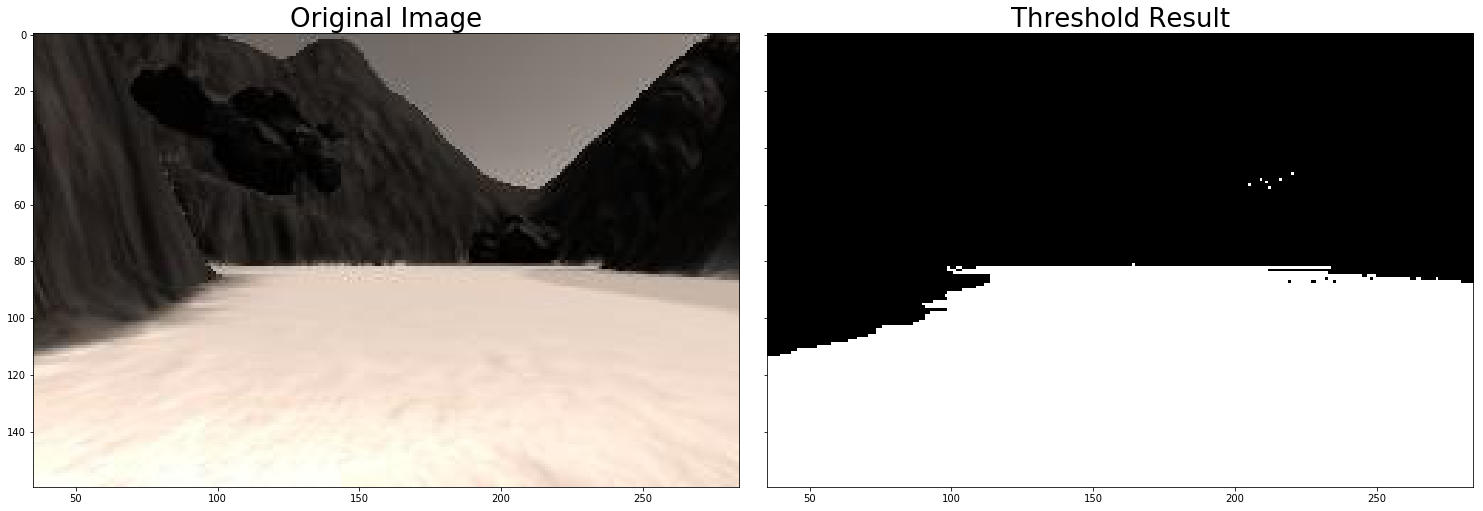

In [11]:
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=26)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Threshold Result', fontsize=26)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

# end